# 2. Разведочный анализ данных (EDA)

## 🚀 Цели этапа
1. Анализ распределения целевой переменной
2. Исследование категориальных признаков
3. Анализ числовых признаков  
4. Поиск корреляций и взаимосвязей
5. Формулировка выводов и гипотез

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('../data/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


## 2.1 🎯Анализ целевой переменной

Анализируем дисбаланс классов - это критично для выбора метрик и стратегии борьбы с дисбалансом.

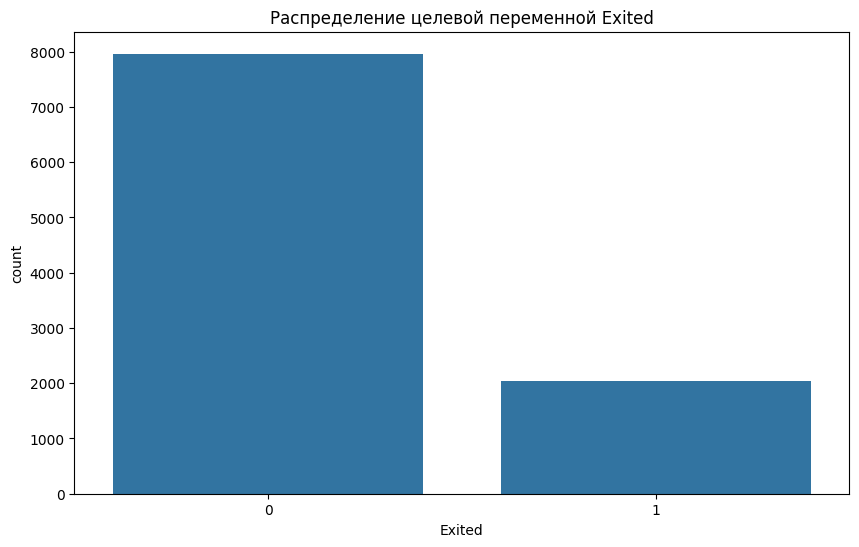

In [3]:
plt.figure(figsize=(10,6))
sb.countplot(data=df, x='Exited')
plt.title('Распределение целевой переменной Exited')
plt.show()

In [7]:
churn_count = df['Exited'].value_counts().min()
remaining_customers = df['Exited'].value_counts().max()
print(f"Сколько человек попали под отток: {churn_count}")
print(f"Сколько человек остались пользоваться услугами банака: {remaining_customers}")

Сколько человек попали под отток: 2038
Сколько человек остались пользоваться услугами банака: 7964


In [4]:
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(f"Процент оттока: {churn_rate[1]:.1f}%")

Процент оттока: 20.4%


Можем заметить, что у нас присутствует дисбаланс классов: из 10002 клиентов 2038 человек перестали пользоваться услугами банка, а 7964 остались преданны банку и продолжают пользоваться его услугами. Следовательно в дальнейшем этапе "Подготовка данных к обучению" мы будем использовать метода балансировки классов, чтобы наша модель давала более точные результаты